# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; and
5. Create meaningful visualizations to analyze the data!
---

## Important Dates

- Homework release: Fri 2 Oct 2020
- **Homework due**: Fri 16 Oct 2020, 23:59
- Grade release: Fri 23 Oct 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the `data` folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in either comments or markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.



## Context

The coronavirus pandemic has led to the implementation of unprecedented non-pharmaceutical interventions ranging from case isolation to national lockdowns. These interventions, along with the disease itself, have created massive shifts in people’s lives. For instance, in mid-May 2020, more than one third of the global population was under lockdown, and millions have since lost their jobs or have moved to work-from-home arrangements.


Importantly, the disease has shifted people's [needs](https://en.wikipedia.org/wiki/Toilet_paper), [interests](https://en.wikipedia.org/wiki/TikTok), and [concerns](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Switzerland) across the globe.

In this homework, we will take a deep dive into Wikipedia data and try to uncover what changed with the pandemic. More specifically, we will be focusing on Wikipedia pageviews, that is, how many people read each article on Wikipedia each day.
A nice graphical user interface for playing with Wikipedia pageviews is available [here](https://pageviews.toolforge.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&range=latest-20&pages=Cat|Dog).
Also, the Wikimedia Foundation releases dump files with the number of pageviews per article across all Wikimedia websites, including Wikipedia in all its language editions [(amazing, right?)](https://dumps.wikimedia.org/other/pagecounts-ez/). 

#### But wait, what is a pageview?

> A pageview or page view, abbreviated in business to PV and occasionally called page impression, is a request to load a single HTML file (web page) of an Internet site. On the World Wide Web, a page request would result from a web surfer clicking on a link on another page pointing to the page in question. (Source: [Wikipedia article "Pageviews"](https://en.wikipedia.org/wiki/Pageview))

Pageviews in Wikipedia can tell us that people are looking for certain information online. Analyzing how the volume and the distribution of pageviews changed can tell us about how the behavior of Wikipedia readers has changed.

In this homework, you will take a deep dive into analyzing Wikipedia pageview logs and uncover shifts in interests associated with the current pandemic.

---

## The data

First, you need to download a **meraviglioso** dataset from the Italian Wikipedia that we prepared for you. The structure of the data is described next. 

**The dataset is available in the `data` directory pushed to the same GitHub repo as the homework**. Inside of the data directory, you will find three files:

### `articles.tsv.gz`

This is a tab-separated file containing daily pageviews for a subset of the articles from Italian Wikipedia. It is compressed! Each row corresponds to a different article, and each column (except the first) corresponds to the number of pageviews this article received on a given day. The example below shows the structure for two of the things [Kristina Gligorić](https://kristinagligoric.github.io/), one of your TAs, likes the most on her Pizza:

**Example:**
~~~
index       2018-01-01 00:00:00    2018-01-02 00:00:00 (...)
Formaggio   100                    101                 (...)
Ananas      12                     54                  (...)
(...)       (...)                  (...)
~~~


### `topics.jsonl.gz`

This is a classification of which topics an article belongs to, according to a model released by the Wikimedia Foundation (the classes are derived from this [taxonomy](https://www.mediawiki.org/wiki/ORES/Articletopic)). Importantly, this file was obtained from English Wikipedia, while the previous one contains articles from the Italian Wikipedia. This is important because article titles in the Italian Wikipedia are in Italian, while article titles in the English page are in English (duh!). In any case, each line contains a .json object with
the English name of the article (name);
1. the English name of the article (`name`);
2. a set of fields related to topics themselves. Each of these fields is set as either `True` (if the article belongs to this topic) or `False` (if it does not). Notice that the same article may belong to multiple topics. 

**Example:**
~~~
{"index": "Cheese", "Culture.Food and drink": True, "Culture.Literature": False (...)}
{"index": "Pineapple", "Culture.Food and drink": True, "Culture.Literature": False (...)}
(...)
~~~

 
### `mapping.pickle`

This is a `.pickle` file, that is, a serialized Python object. You can read about Python pickles  [here](https://wiki.python.org/moin/UsingPickle), 
but in short: the default Python library `pickle` allows you to save and load Python objects to and from disk. This is one object saved via the pickle library: a Python dictionary containing a mapping between the English names and the Italian names of Wikipedia articles:

**Example:**
~~~
{
    "Cheese": "Formaggio",
    "Ananas": "Pineapple"
    (...)
}
~~~
---


## _Step 1:_ Loading the data

---
### **Task 1**

Your first task is to load all these datasets into memory using pandas and pickle. 
**You should load the files compressed.**

Here, the files at hand are rather small, and you could easily uncompress  the files to disk and work with them as plain text. 
Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, this will often not be the case.

Then, working with compressed files is key so that you don't receive e-mail from your (often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your datasets. 
Another big advantage of compressing files is to simply read files faster. You will often find that reading compressed data on the fly (uncompressing it as you go), is much faster than reading compressed data, since reading and writing to the disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

 
---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). Check the `error_bad_lines` parameter on `read_csv`.

In [1]:
import pandas as pd
import pickle

### ~ 1.1

In [2]:
DATA_FOLDER = 'Data/'
ARTICLES_DATASET = DATA_FOLDER+"articles.tsv.gz"
TOPICS_DATASET = DATA_FOLDER+"topics.jsonl.gz"
MAPPING_DATASET = DATA_FOLDER+"mapping.pickle"

In [3]:
articles = pd.read_csv(ARTICLES_DATASET, compression='gzip', sep='\t', error_bad_lines=False)
# Line 7 is ignored because it has 945 fields (one more than all the other lines)
articles.head()

b'Skipping line 7: expected 944 fields, saw 945\n'


,index,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,...,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
0,Khulna,0,2,1,0,0,2,0,2,0,...,0,1,1,0,1,1,0,2,1,2
1,Karim_Ansarifard,1,5,1,1,1,3,6,4,5,...,2,2,0,1,2,0,1,0,0,0
2,Poldhu,0,0,1,1,0,1,0,2,2,...,0,2,2,0,0,0,2,1,2,1
3,Alice_(The_Sisters_of_Mercy),0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,Palmyra,1,4,0,0,0,2,11,2,0,...,0,0,1,0,0,0,1,0,0,0


In [4]:
topics = pd.read_json(TOPICS_DATASET, compression='gzip', lines=True)
topics.head()

,index,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,...,STEM.Mathematics,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia
0,Chinese_food_therapy,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,Battle_of_Naissus,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Battle_of_Stoke_Field,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,Smooth_newt,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Vicente_Aleixandre,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
mapping = pd.read_pickle(MAPPING_DATASET)

## _Step 2:_ Filtering the data

---
### **Task 2**

Oh no! Something seems wrong with your dataframe!
It seems that some of the lines in the `articles.tsv.gz` are weird! 
They have titles in the format `"Discussione:name_of_the_page"`.

Unsure of what they mean, you ask about them in the [Wiki-research mailing list](https://lists.wikimedia.org/mailman/listinfo/wiki-research-l).
Twenty minutes later a kind internet stranger comes with an answer! 
She tells you that these are talk pages, where people discussing what should and should not be in the article (in fact it can be pretty funny to read, eg, [you can read Italians debating about pizza](https://it.wikipedia.org/wiki/Discussione:Pizza))

After understanding what they are, your task is now to filter these lines using `pandas`! After all, we are interested in pageviews going towards articles! Not discussion pages!

---

**Hint**: There is one of them in the position \#180 of the dataframe, if you want to check it!

In [6]:
articles.loc[[180]]

,index,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,...,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
180,Discussione:Jitter,21,41,42,55,51,31,31,39,60,...,32,34,28,17,13,34,33,16,21,21


In [7]:
articles['index'].str.contains("Discussione").head(181)

0      False
1      False
2      False
3      False
4      False
       ...  
176    False
177    False
178    False
179    False
180     True
Name: index, Length: 181, dtype: bool

### ~ 2.1

In [8]:
articles = articles[~articles['index'].str.contains("Discussione")]

## *Step 3*: Understanding the data

---
### **Task 3.1**
Data cleaning is hard huh? But now that this headache is behind us we can go on to explore our data.

Let's begin with some basic stats. It is always important to do this as a sanity check.

You should:

1. Start by calculating how many topics and articles there are. Also, while you are at it, print the names of the topics to get a grasp of what they are about. 
2. Calculate the average daily number of pageviews in the dataset.
3. **Discuss:** As previously mentioned, your data is a sample of _some_ (and not all) Wikipedia articles! Estimate (roughly) what percentage of Italian Wikipedia articles are in your dataset comparing your daily average pageview numbers with the official statistics (which can be found [here](https://pageviews.toolforge.org/siteviews/?platform=desktop&source=pageviews&agent=user&start=2020-01-01&end=2020-09-21&sites=it.wikipedia.org)). Notice that we are focusing on the desktop version of Wikipedia.

---
**Hint**: topics are in the columns of the topic file!

### ~ 3.1.1

In [9]:
print("There are", topics.columns.unique().size-1, "topics:")
print(*topics.columns.unique()[1:10].tolist(), sep='\n')
print("There are", articles['index'].unique().size, "articles:")
print(*articles['index'].unique().tolist()[:10], sep='\n')
print("....")

There are 64 topics:
Geography.Regions.Asia.Central Asia
Geography.Regions.Europe.Eastern Europe
History and Society.Military and warfare
Culture.Media.Television
History and Society.Education
Culture.Media.Books
Geography.Regions.Africa.Africa*
Culture.Visual arts.Architecture
Culture.Biography.Women
There are 55791 articles:
Khulna
Karim_Ansarifard
Poldhu
Alice_(The_Sisters_of_Mercy)
Palmyra
Hawkins_(serie_televisiva)
Villa_Barni
Playgirl_(film)
HMS_Bellona_(1760)
Villa_Franchin
....


### ~ 3.1.2

In [10]:
# The average daily number of pageviews in the filtered dataset for each day
articles.mean()

2018-01-01 00:00:00    3.953487
2018-01-02 00:00:00    6.492678
2018-01-03 00:00:00    6.616031
2018-01-04 00:00:00    6.786919
2018-01-05 00:00:00    6.508613
                         ...   
2020-07-27 00:00:00    5.485275
2020-07-28 00:00:00    4.286677
2020-07-29 00:00:00    4.112939
2020-07-30 00:00:00    4.349089
2020-07-31 00:00:00    4.268968
Length: 943, dtype: float64

In [11]:
# Daily pageviews average across all the articles of our dataset and over the whole period
subset_avg = articles.iloc[:,1:].sum().mean()

### ~ 3.1.3

In [12]:
#average daily pageviews across all italian wikipedia articles
OVERALL_AVG = 5731987

print("Percentage of Italian Wikipedia articles in our dataset: ", (subset_avg/OVERALL_AVG)*100, "%")

Percentage of Italian Wikipedia articles in our dataset:  5.657159921366361 %


#### Comments:
We can see that our subset's pageviews average is very small (5.7%) compared to the overall average.
This is explained by the fact that the overall number of articles is huge compared to our sample. It's also possible that some very popular articles which are not in our dataset make most of the pageviews.


### **Task 3.2**

Now that we have a better understanding of the data, let's look at some articles to get a feeling of what is happening. 

Your task is to:

1. Find all articles whose names contain the sequence of characters `"virus"` (case insensitive) and that received least 7,000 pageviews across the entire period (no point in zooming on very insignificant articles);
2. Find a way to nicely visualize __each__ one of the time-series (in a single plot, which may have multiple panels; in the lecture, Bob referred to these as “small multiples); Your visualization should allow one to see overall trends across each of the different articles and depict the overall trends, with the least noise possible. Additionally, highlight two specific dates in your plot: 31 January ([first case reported in Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#First_confirmed_cases)) and 21 February ([when multiple cases were confirmed in northern Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#Clusters_in_northern_Italy)).
4. **Discuss**: What did you observe? Did all the articles behave similarly?

---

**Hint**: The column dates are currently strings which are not very plot friendly. You can turn them into datetime objects using: 

~~~python
your_dataframe_name.columns = pd.to_datetime(your_dataframe_name.columns)
~~~

Notice that this only works if you have only date-related columns. Fortunately, if you get rid of the `index` column by making it a real pandas index, things should work just fine.

**Hint**: Choose your axes wisely!



### ~ 3.2.1

In [13]:
import re
virus_articles = articles[(articles['index'].str.contains("virus", flags=re.IGNORECASE)) & (articles.sum(axis=1)>=7000)]
virus_articles

,index,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,...,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
5133,Virus_della_leucemia_felina,11,27,20,28,24,9,13,36,30,...,13,12,13,9,6,10,11,7,7,8
8297,Malattia_da_virus_Ebola,3,21,13,23,28,5,11,11,17,...,142,30,25,126,30,27,147,25,39,146
12382,Influenzavirus_A_sottotipo_H1N1,20,23,49,52,46,108,271,143,75,...,37,27,30,70,36,39,39,35,35,44
18385,Rhinovirus,6,9,12,22,13,12,21,18,19,...,8,10,10,13,6,14,10,8,9,14
41679,Virus_(informatica),26,70,74,66,86,44,67,94,107,...,21,38,21,18,30,24,33,28,22,17
46472,Herpesvirus_umano_3,2,5,5,14,6,13,9,12,11,...,10,9,10,5,7,8,13,5,9,8
54162,Antivirus,19,31,26,27,42,30,24,54,45,...,16,33,25,14,14,19,23,23,22,12
56429,Virus_respiratorio_sinciziale_umano,6,11,18,18,15,14,9,21,17,...,11,10,10,4,4,9,4,12,5,7


### ~ 3.2.2

In [14]:
#Italian english mapping
"""We will use the reverse mapping to get some more sense of the data"""
IT_ENG_map = {v: k for k, v in mapping.items()}

In [15]:
virus_for_plot = virus_articles.set_index('index').transpose()
virus_for_plot.index = pd.to_datetime(virus_for_plot.index)

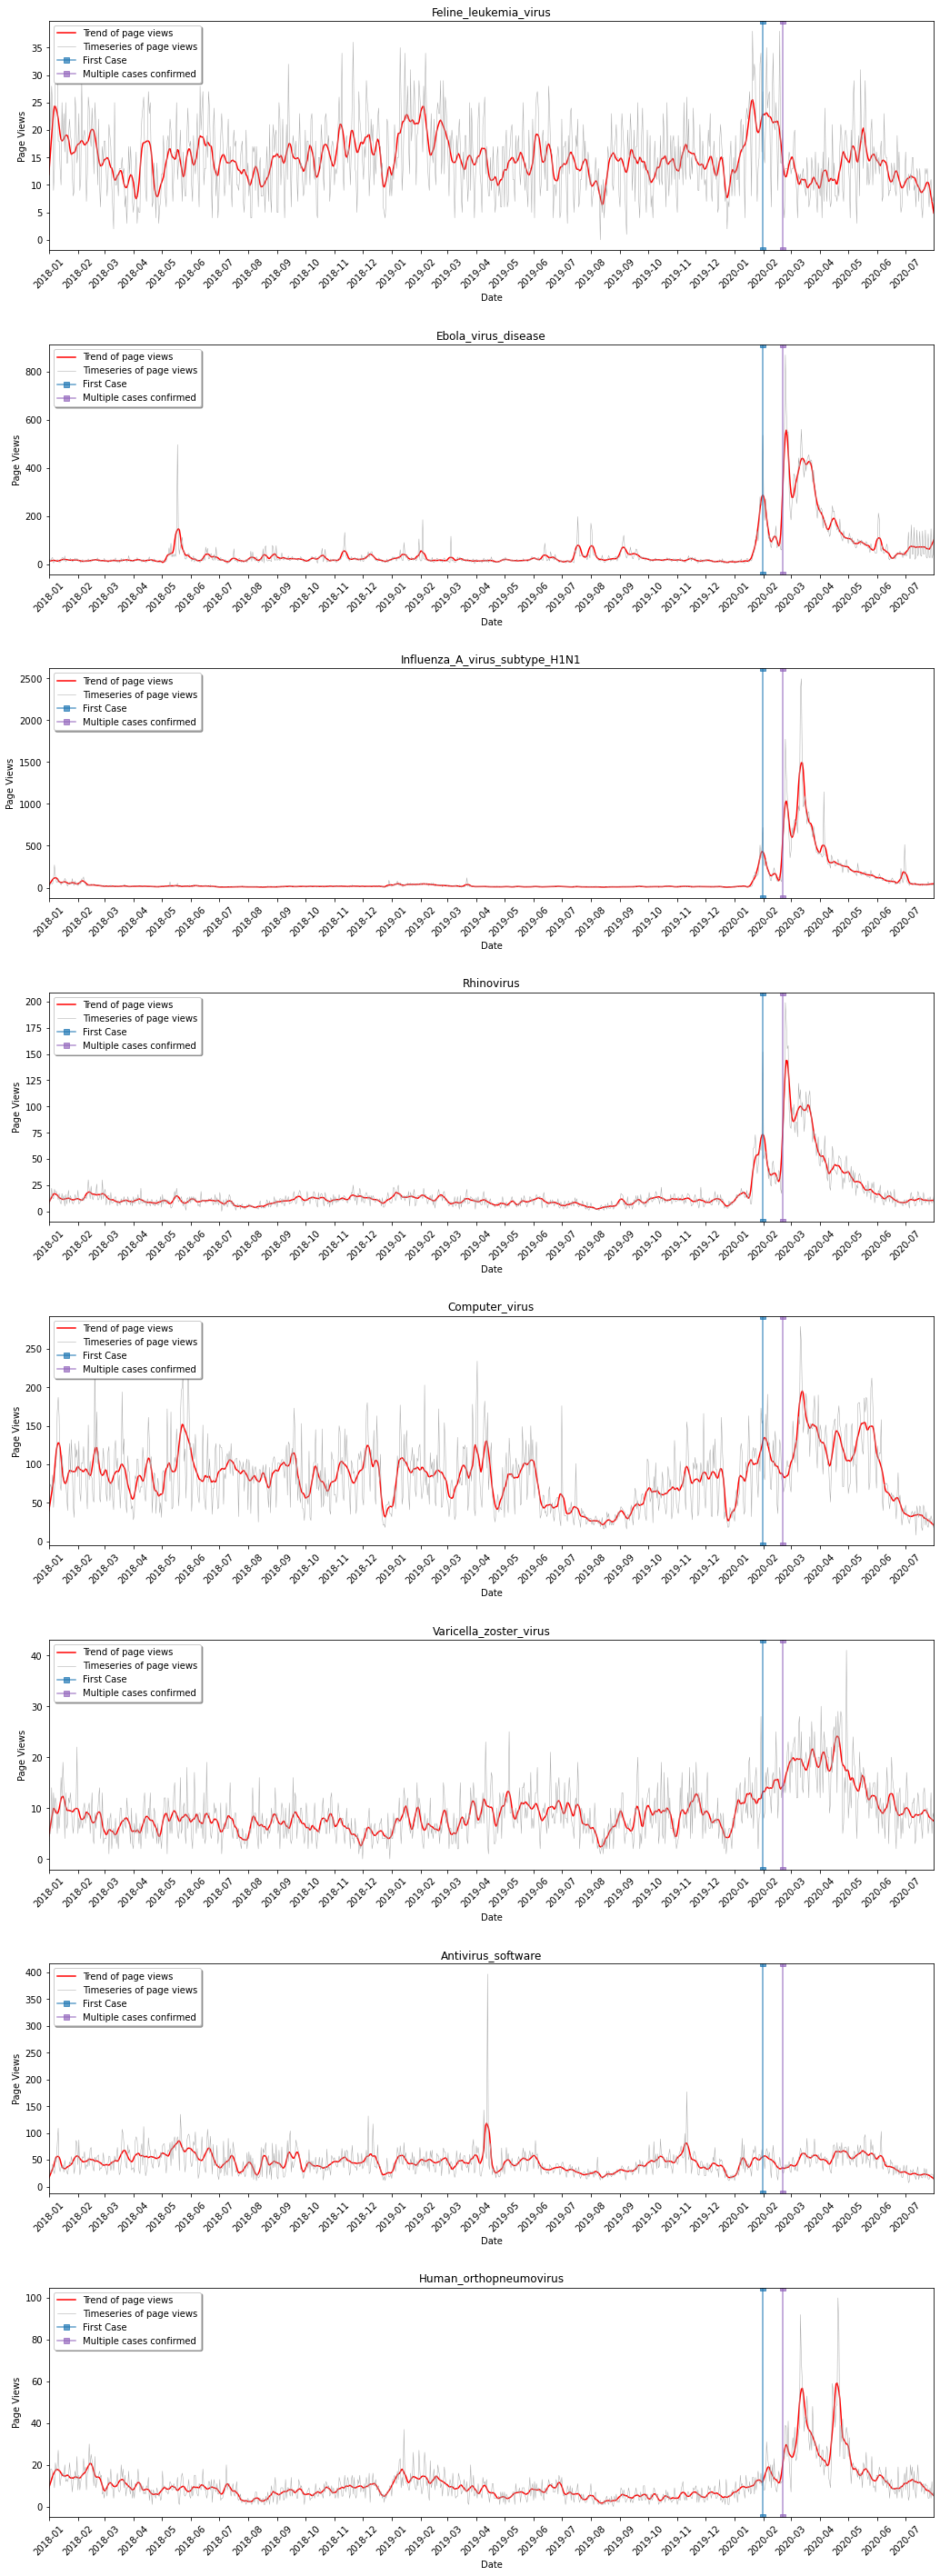

In [16]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.dates import *
from datetime import datetime
from statsmodels.tsa.seasonal import STL

fig, axs = plt.subplots(len(virus_for_plot.columns), figsize=(15,40))

# Define the date format
date_form = DateFormatter("%Y-%m")

for i, name in enumerate(virus_for_plot.columns):
    
    res = STL(virus_for_plot[name], period=7).fit()
    res.trend.plot(ax=axs[i], label="Trend of page views", c='r')
    axs[i].plot(virus_for_plot[name], label="Timeseries of page views", c='darkgrey', linewidth=0.5)
    
    axs[i].axvline(date2num(datetime(2020,1,31)), label="First Case", color="tab:blue", marker = 's', alpha=0.7)
    axs[i].axvline(date2num(datetime(2020,2,21)), label="Multiple cases confirmed", color="tab:purple", marker = 's', alpha=0.7)
    axs[i].set_title(IT_ENG_map[virus_for_plot.columns[i]])
    axs[i].xaxis.set_major_formatter(date_form)
    axs[i].xaxis.set_major_locator(MonthLocator())
    axs[i].set(xlabel="Date", ylabel="Page Views")
    axs[i].legend(shadow=True, loc='upper left')
    plt.setp(axs[i].get_xticklabels(), rotation=45)
    
fig.tight_layout(pad=3.0)

Using STL (seasonal trend decomposition) with a weekly seasonality, we can get the trend to clearly see the impact of covid 19 on the page views of viruses related articles. 
We chose a weekly seasonality because, looking at the plots of page views for each article, it seems like there is a cycle each week where people use slightly more wikipedia during some days of the week.

### ~ 3.2.3

The different trends of the articles through the period of time show multiple spikes and drops. We can see that Ebola, Influenza A H1N1 and Rhinovirus and Human orthopneumovirus all witnessed an increase in interest around the 31st of January which corresponds to the first case of the Covid-19 virus. Even if this interest dropped after, it jumped again and higher following the confirmation of multiple cases on the 21st of February. Even if these are not articles about covid19 specifically, people still search for informations about viruses for comparison and we can clearly see this reasoning when we hear people comparing Covid-19 with the flu. Another interesting observation is that all this excitement about viruses faded away after the lockdown. The page views went back to the attention they had before the pandemic. 

Varicella Zoster saws a slight upstic in pageviews after the first Covid-19 while Feline leukemia had a slight decrease after the confirmation of multiple cases. The interest for these viruses didn't respond in the same way probably because their behavior is really different from the Covid-19, the Influenza or Ebola.

Finally, the computer virus had surprisingly a similar but less significative trend. This could be due to the fact that when people search for virus, it's one of the first page to appear.

"Funny" Fact: The spike in Antivirus software page corresponds to the release of a windows 10 update which had issues with the most common antivirus softwares.


### **Task 3.3**

Before we move on, let's make a final sanity check and analyze the distribution of pageviews over all articles in our dataset. You are given a function to calculate the **cumulative distribution function** (CDF) of a sample. The CDF is a function f(x) associated with a data sample. For each value x, f(x) represents the percentage of elements in your sample that have values smaller or equal to x (read more about it [here](https://en.wikipedia.org/wiki/Empirical_distribution_function)).
Your task is to:

1. Calculate the CDF of the distribution of pageviews across all days over articles. That is, a) calculate the total number of pageviews each article has received and then, b) calculate the CDF for these values.


2. Now plot this function using different scales for the x- and y-axis. You should plot it in 4 different ways:

    a. x-axis on linear scale, y-axis on linear scale
    
    b. x-axis on log scale, y-axis on linear scale
    
    c. x-axis on linear scale, y-axis on log scale
    
    d. x-axis on log scale, y-axis on log scale
    
3. **Discuss:** There is a pretty odd fact about the distribution of our data! Can you spot it and describe it? Which of the different plots (a-d) allows you to find this oddity? Why isn't this visible in the other plots?

---

**Hint:** You can use `plt.xscale` and `plt.yscale`.

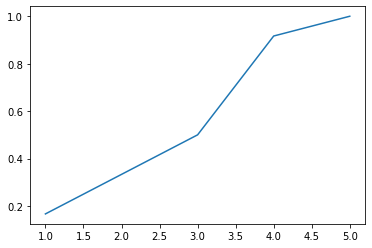

In [17]:
# This function is being given to you with a usage example :)! Make good use!

import numpy as np

def get_cdf(vals):
    # Input:
    # -- vals: an np.array of positive integers
    # Output:
    # -- x: an array containing all numbers from 1 to max(vals);
    # -- y: an array containing the (empirically calculated) probability that vals <= x
    
    y = np.cumsum(np.bincount(vals)[1:])
    y = y / y[-1]
    y = y
    x = list(range(1, max(vals) + 1))
    return x, y  

vals = np.array([1,2,3,4,1,2,4,3,4,4,5,4])
x, y = get_cdf(vals)
plt.plot(x, y)
plt.show()

### ~ 3.3.1

In [18]:
tot_per_article = articles.sum(axis=1)
x, y = get_cdf(tot_per_article.values)

### ~ 3.3.2

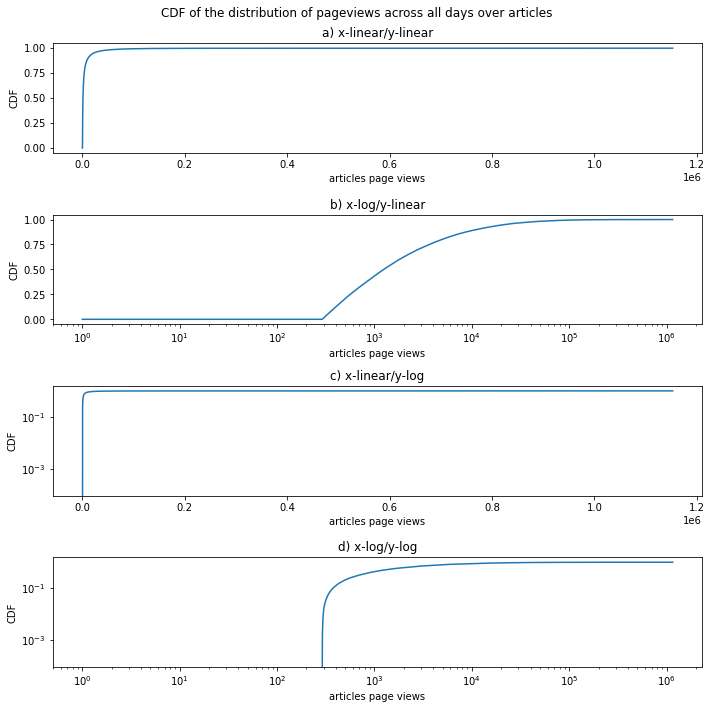

In [19]:
fig, axs = plt.subplots(4, 1, figsize=(10,10), sharex = False)
fig.suptitle('CDF of the distribution of pageviews across all days over articles')

#x-linear/y-linear
axs[0].plot(x, y)
axs[0].set_xlabel('articles page views')
axs[0].set_ylabel('CDF')
axs[0].set_title('a) x-linear/y-linear');

#x-log/y-linear
axs[1].plot(x, y)
axs[1].set_xscale('log')
axs[1].set_xlabel('articles page views')
axs[1].set_ylabel('CDF')
axs[1].set_title('b) x-log/y-linear');

#x-linear/y-log
axs[2].plot(x, y)
axs[2].set_yscale('log')
axs[2].set_xlabel('articles page views')
axs[2].set_ylabel('CDF')
axs[2].set_title('c) x-linear/y-log');

#x-log/y-log
axs[3].plot(x, y)
axs[3].set_xscale('log')
axs[3].set_yscale('log')
axs[3].set_xlabel('articles page views')
axs[3].set_ylabel('CDF')
axs[3].set_title('d) x-log/y-log');

plt.tight_layout()
plt.show()

### ~ 3.3.3

The plots "a" and "c" show that the distribution has a logarithmic shape: we see a rapid rise near 0 and at a first glance it looks like almost all the articles have 0 views . Indeed, most articles have a number of pageviews of the same magnitude. And this number of pageview is usually low compared to the possible high values the pageview count can take. Therefore, when we compute the CDF, that is the probability for an article to have less pageviews than the corresponding value on the x axis, we get this shape.
In that case, a logarithmic scale on the x axis is better suited.

Consequently, in the plot "b" allows us to better analyze the pageviews probabilities.

Finally in the plot "d", it's like there is no probability for for view below 500. This is due to the fact that the log scale is not adapted to the y axis. Indeed the probabilities can take all values between 0 and 1 which is only one magnitude order.

## *Step 4*: Analyzing Overall Pageview Volume


---
### **Task 4.1**

So far we have seen anecdotal examples. Now let’s move to the big picture! How did Wikipedia pageviews change in general? To gain a better understanding of how Wikipedia’s overall pageview volume has changed during the pandemic, you should do the following:

1. Calculate and visualize the pageviews trends across summed across **all** articles in Italian Wikipedia for the year 2020. (and only for 2020!). 
2. **Discuss**: what regular pattern (something that repeats over and over) do you see in the data?
3. Pre-process the data to remove this regular pattern and make the overall trend clearer. Repeat the plot with the processed data.

---

**Hint**: A convenient way to use `.groupby` alongside dates is to use the [`pd.Grouper`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html) class. Basically, it allows you to group by date periods given frequencies determined by the parameter `freq`. To read how to specify different types of frequencies, see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases). Recall that, in order to turn an index, column index -- or pretty much anything -- into a timestamp, you can use  [`pd.to_timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_timestamp.html).

### ~ 4.1.1

In [20]:
articles_tr = articles.set_index('index').transpose()
articles_tr.index = pd.to_datetime(articles_tr.index)

In [21]:
# Keep only the 2020 articles
articles_2020 = articles_tr[articles_tr.index >= datetime(2020,1,1)]

In [22]:
articles_2020 = articles_2020.reset_index().rename(columns={'index': 'date'})
articles_2020_ts = pd.DataFrame(articles_2020.set_index('date').sum(axis=1))

In [23]:
per_week = articles_2020_ts.resample("1W").sum()
per_month = articles_2020_ts.resample("1m").sum()
per_trimester = articles_2020_ts.resample("3m").sum()

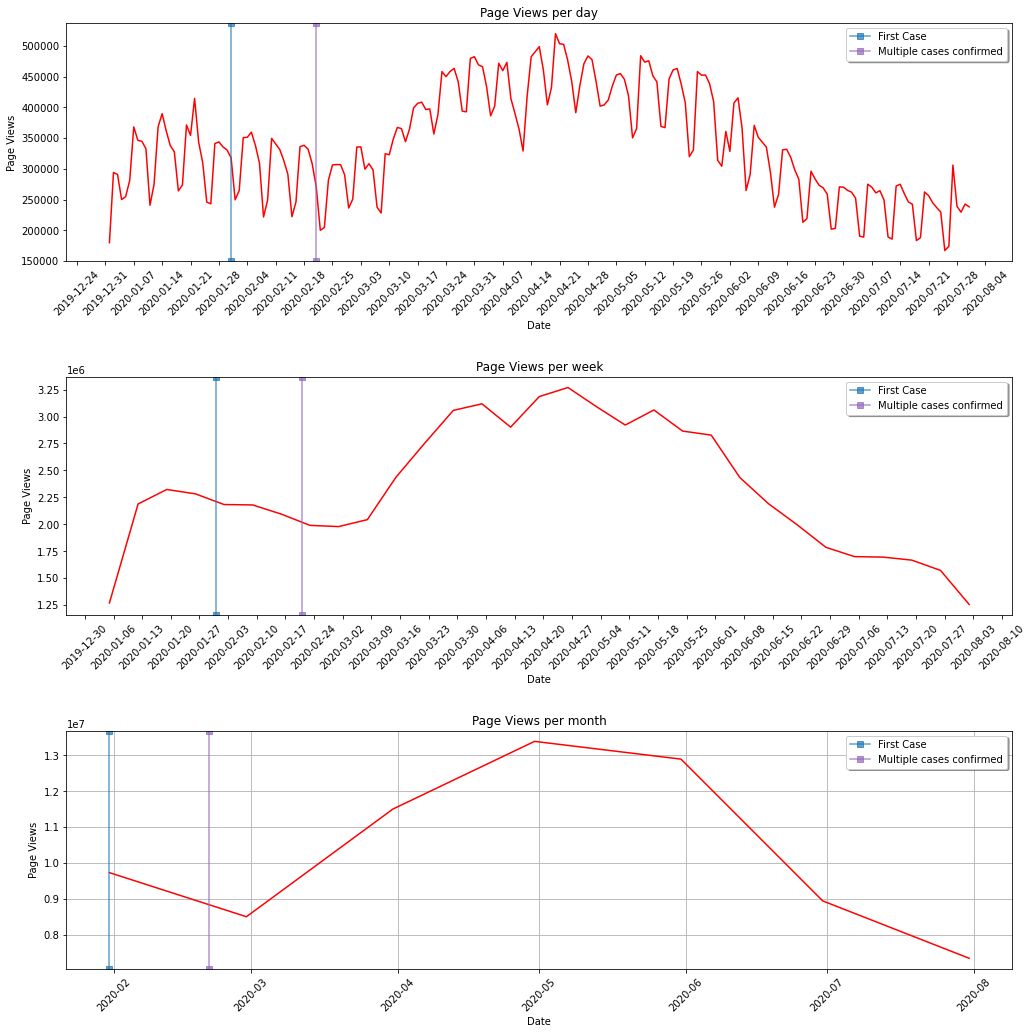

In [24]:
fig, axs = plt.subplots(3, figsize=(15,15))

# Time series of page views per day
# Define the date format
date_form = DateFormatter("%Y-%m-%d")
loc = WeekdayLocator()

axs[0].set_title("Page Views per day")
axs[0].set(xlabel="Date", ylabel="Page Views")
axs[0].xaxis.set_major_formatter(date_form)
axs[0].xaxis.set_major_locator(loc)
axs[0].plot(articles_2020_ts, c='r')
plt.setp(axs[0].get_xticklabels(), rotation=45)

# Time series of page views per week
date_form = DateFormatter("%Y-%m-%d")
# Tick on mondays every week
loc = WeekdayLocator(byweekday=MO)

axs[1].set_title("Page Views per week")
axs[1].xaxis.set_major_formatter(date_form)
axs[1].xaxis.set_major_locator(loc)
axs[1].set(xlabel="Date", ylabel="Page Views")
axs[1].plot(per_week, c='r')
plt.setp(axs[1].get_xticklabels(), rotation=45)
                 
# Time series of page views per month
date_form = DateFormatter("%Y-%m")
loc = MonthLocator()

axs[2].set_title("Page Views per month")
axs[2].set(xlabel="Date", ylabel="Page Views")
axs[2].xaxis.set_major_formatter(date_form)
axs[2].xaxis.set_major_locator(loc)
axs[2].plot(per_month, c='r')
plt.setp(axs[2].get_xticklabels(), rotation=45)

for i in range(3):
    axs[i].axvline(date2num(datetime(2020,1,31)), label="First Case", color="tab:blue", marker = 's', alpha=0.7)
    axs[i].axvline(date2num(datetime(2020,2,21)), label="Multiple cases confirmed", color="tab:purple", marker = 's', alpha=0.7)
    axs[i].legend(shadow=True)

plt.grid(True)
fig.tight_layout(pad=3.0)
plt.show()

### ~ 4.1.2

There seems to be some weekly seasonality in the data as suspected before in 3.2.2. In particular, there is a decrease in page views during weekends. (This is why we removed the seasonality in 3.2.2 which gave us a clearer vision of trend.)

### ~ 4.1.3

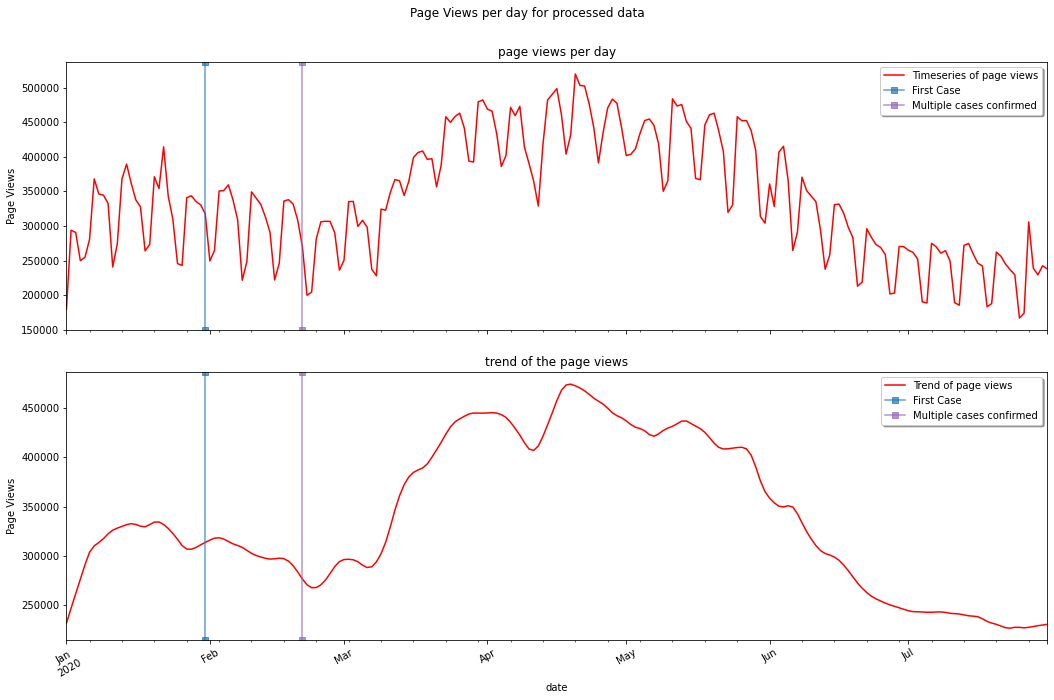

In [25]:
# Removing seasonality and keeping only the trend
res = STL(articles_2020_ts, period=7).fit()

# Plot of the processed data
fig, ax = plt.subplots(2, figsize=(15,10), sharex=True)
fig.suptitle("Page Views per day for processed data")

ax[0].set_title('page views per day')
ax[0].set(xlabel="Date", ylabel="Page Views")
ax[0].plot(articles_2020_ts, label="Timeseries of page views", c='r')
ax[0].axvline(date2num(datetime(2020,1,31)), label="First Case", color="tab:blue", marker = 's', alpha=0.7)
ax[0].axvline(date2num(datetime(2020,2,21)), label="Multiple cases confirmed", color="tab:purple", marker = 's', alpha=0.7)
ax[0].legend(shadow=True)
   
ax[1].set_title('trend of the page views')
ax[1].set(xlabel="Date", ylabel="Page Views")
res.trend.plot(ax=ax[1], label="Trend of page views", c='r')
ax[1].axvline(date2num(datetime(2020,1,31)), label="First Case", color="tab:blue", marker = 's', alpha=0.7)
ax[1].axvline(date2num(datetime(2020,2,21)), label="Multiple cases confirmed", color="tab:purple", marker = 's', alpha=0.7)
ax[1].legend(shadow=True)

plt.setp(ax[1].get_xticklabels(), rotation=30)
fig.tight_layout(pad=2.0)

plt.show()

### **Task 4.2**

To get an even clearer picture, your task now is to compare the pageview time series of the current year (2020) with the time series of the previous year (2019).

1. Make a visualization where the two years are somehow "aligned", that is, where it is possible to compare the same time of year across the two years. Additionally, your visualization should highlight the date on which the nationwide lockdown started in Italy, 9 March 2020. Preprocess each one of the time series (for each year) the same way you did in Task 4.1.

3. **Discuss:** What changed from 2019 to 2020? Form and justify hypotheses about  the reasons behind this change.

---

**Hint**: In order to use two different y-axes in the same plot, you can use plt.twiny() or ax.twinx() (the latter if you are using the subplots environment;  [See this example](https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/two_scales.html)).

### ~ 4.2.1

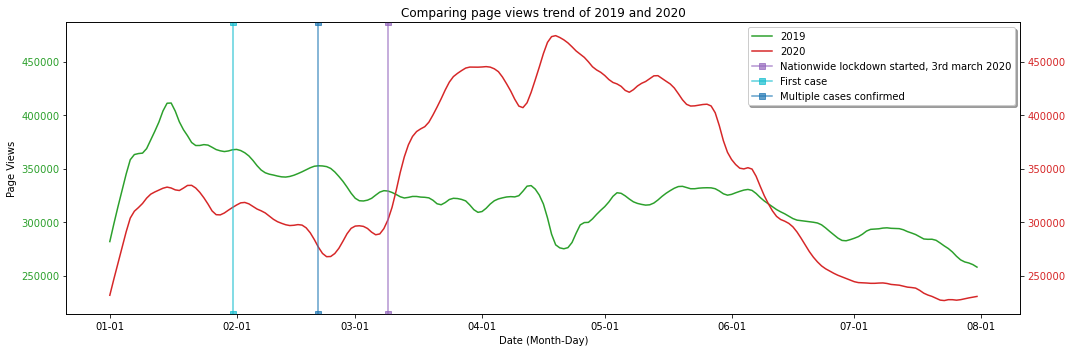

In [26]:
# 2019 and 2020 time series for page views
articles_2019 = articles_tr[(articles_tr.index >= datetime(2019,1,1)) & (articles_tr.index < datetime(2020,1,1))]
articles_2019 = articles_2019.reset_index().rename(columns={'index': 'date'})
articles_2019_ts = pd.DataFrame(articles_2019.set_index('date').sum(axis=1))


articles_2019_trend = STL(articles_2019_ts, period=7).fit().trend
articles_2020_trend = STL(articles_2020_ts, period=7).fit().trend

x = articles_2020_trend.index
y_19 = articles_2019_trend.values[:x.size,]
y_20 = articles_2020_trend.values

# Define the date format
date_form = DateFormatter("%m-%d")

# Comparing time series
fig, ax1 = plt.subplots(figsize=(15,5))

color = "tab:green"
ax1.set_title("Comparing page views trend of 2019 and 2020")
ax1.plot(x, y_19, c=color, label="2019")
ax1.tick_params(axis='y', labelcolor=color)
ax1.set(xlabel="Date (Month-Day)", ylabel="Page Views")

color = "tab:red"
ax2 = ax1.twinx()
ax2.plot(x, y_20, c=color, label="2020")
ax2.tick_params(axis='y', labelcolor=color)

ax2.get_shared_y_axes().join(ax1, ax2)

ax2.xaxis.set_major_formatter(date_form)
ax2.axvline(date2num(datetime(2020,3,9)), label="Nationwide lockdown started, 3rd march 2020", color="tab:purple", marker = 's', alpha=0.7)
ax2.axvline(date2num(datetime(2020,1,31)), label="First case", color="tab:cyan", marker = 's', alpha=0.7)
ax2.axvline(date2num(datetime(2020,2,21)), label="Multiple cases confirmed", color="tab:blue", marker = 's', alpha=0.7)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels  = labels1 + labels2

plt.legend(handles, labels, shadow=True,loc=0)
fig.tight_layout()
plt.show()

### ~ 4.2.2

First, we notice that at the begining of 2020 page views count was smaller than the previous year. However, we can see that following the national lockdown in Italy there is an increase in page views. This can be explained by the interest to know more about the coronavirus like we've seen in the above analysis. Moreover, this could be amplified by the fact that people are staying indoor and thus have more free time to spend online, searching for articles.

## *Step 5*: Fiddling with Topics

---
### **Task 5.1**

We now turn to a different question: what topics were impacted by the lockdown? 
To start unpacking this question, your task now is to aggregate, for each day, all pageviews that went to each one of the 64 topics. 

There are multiple ways to do this, but for the sake of this exercise, you must create a dataframe where each row contains the number of pageviews a topic obtained on a given day! Example:

~~~
index       date                   views             
TOPIC1      2019-01-01             101              
TOPIC1      2019-01-02             151             
(...)       (...)                  (...)
TOPICK      2019-01-01             1010              
TOPICK      2019-01-02             2123            
(...)       (...)                  (...)
~~~

---

**Hint**: You've should find a way to make the index in the dataframe with the topics be the same as the index in the dataframes with the articles. See the file `mapping.pickle`.

**Hint**: You may want to use `.melt`.

In [27]:
# List of articles and topics with italian name
topics_it = topics.copy()
topics_it['italian_name'] = topics['index'].apply(lambda x: mapping[x])
topics_it = topics_it.drop(['index'],axis=1)
topics_it = topics_it.set_index('italian_name').reset_index()

# We're using melt to ensure that each article and its corresponding topic are on the same row together with its boolean 
# value and then filter and drop the value
topics_values = pd.melt(topics_it, id_vars=['italian_name'], var_name= 'topic', value_vars=topics_it.columns[1:,])
#filtering and dropping the value
topics_values = topics_values[topics_values['value']].drop(['value'], axis=1)

# List of articles and views per date
article_views = pd.melt(articles, id_vars=['index'], value_vars=articles.columns[1:,])
article_views.columns = ['index','date','views']
article_views.date = pd.to_datetime(article_views.date)

# Merging the two data frames so we have the topics for each article
merged = article_views.merge(topics_values, left_on='index', right_on='italian_name')
merged = merged.drop(['italian_name'],axis=1)

# Groupping by topic and date
topic_views = merged.groupby(['topic','date']).sum()

In [28]:
# The data frame of topics, each topic indexing its timeseries of page views.
topic_views

views
topic                        date             
Culture.Biography.Biography* 2018-01-01  58085
                             2018-01-02  86933
                             2018-01-03  88693
                             2018-01-04  94648
                             2018-01-05  90808
...                                        ...
STEM.Technology              2020-07-27  11507
                             2020-07-28  11023
                             2020-07-29  11131
                             2020-07-30  12406
                             2020-07-31  10467

[60352 rows x 1 columns]

### **Task 5.2**

Now to the **grand finale**. We will consider two periods:
- the 35 days before the quarantine started (in the 9th of March); and 
- the 34 days after the quarantined started (including the day of the quarantine itself).

Create a visualization where you can compare, for each topic, the mean **number of views** in the aforementioned periods (that is, before and after the quarantine started). **Although there is a very large number of topics, your visualization should be a compact panel, small enough to fit on an A4 page.**

---

**Hint**: [Hoooray](https://seaborn.pydata.org/examples/index.html).

In [29]:
# Before quarantine
before_quar = pd.date_range(end='2020-03-09', periods=35, closed ='left')
# After quarantine
after_quar = pd.date_range(start='2020-03-09', periods=34, closed ='left')

idx = pd.IndexSlice
before = topic_views.loc[idx[:,before_quar],:] 
after  = topic_views.loc[idx[:,after_quar],:]

# Group by the topics to calculate the mean page views on each period
top_meanviews_bq = before.groupby('topic').mean()
top_meanviews_aq = after.groupby('topic').mean()

# top_meanviews will have the mean page views before and after quarantine for each topics
top_meanviews = top_meanviews_bq.join(top_meanviews_aq, lsuffix='_bq', rsuffix='_aq')

# Rearranging data so we can plot it using seaborn
topic_meanviews = pd.melt(top_meanviews.reset_index(), id_vars='topic', var_name="period", value_name="mean_views")
topic_meanviews = topic_meanviews.sort_values('topic').reset_index(drop=True)
topic_meanviews.head(6)

,topic,period,mean_views
0,Culture.Biography.Biography*,views_bq,64016.970588
1,Culture.Biography.Biography*,views_aq,88034.823529
2,Culture.Biography.Women,views_aq,17370.088235
3,Culture.Biography.Women,views_bq,12504.588235
4,Culture.Food and drink,views_bq,3191.235294
5,Culture.Food and drink,views_aq,4323.441176


<Figure size 864x648 with 0 Axes>

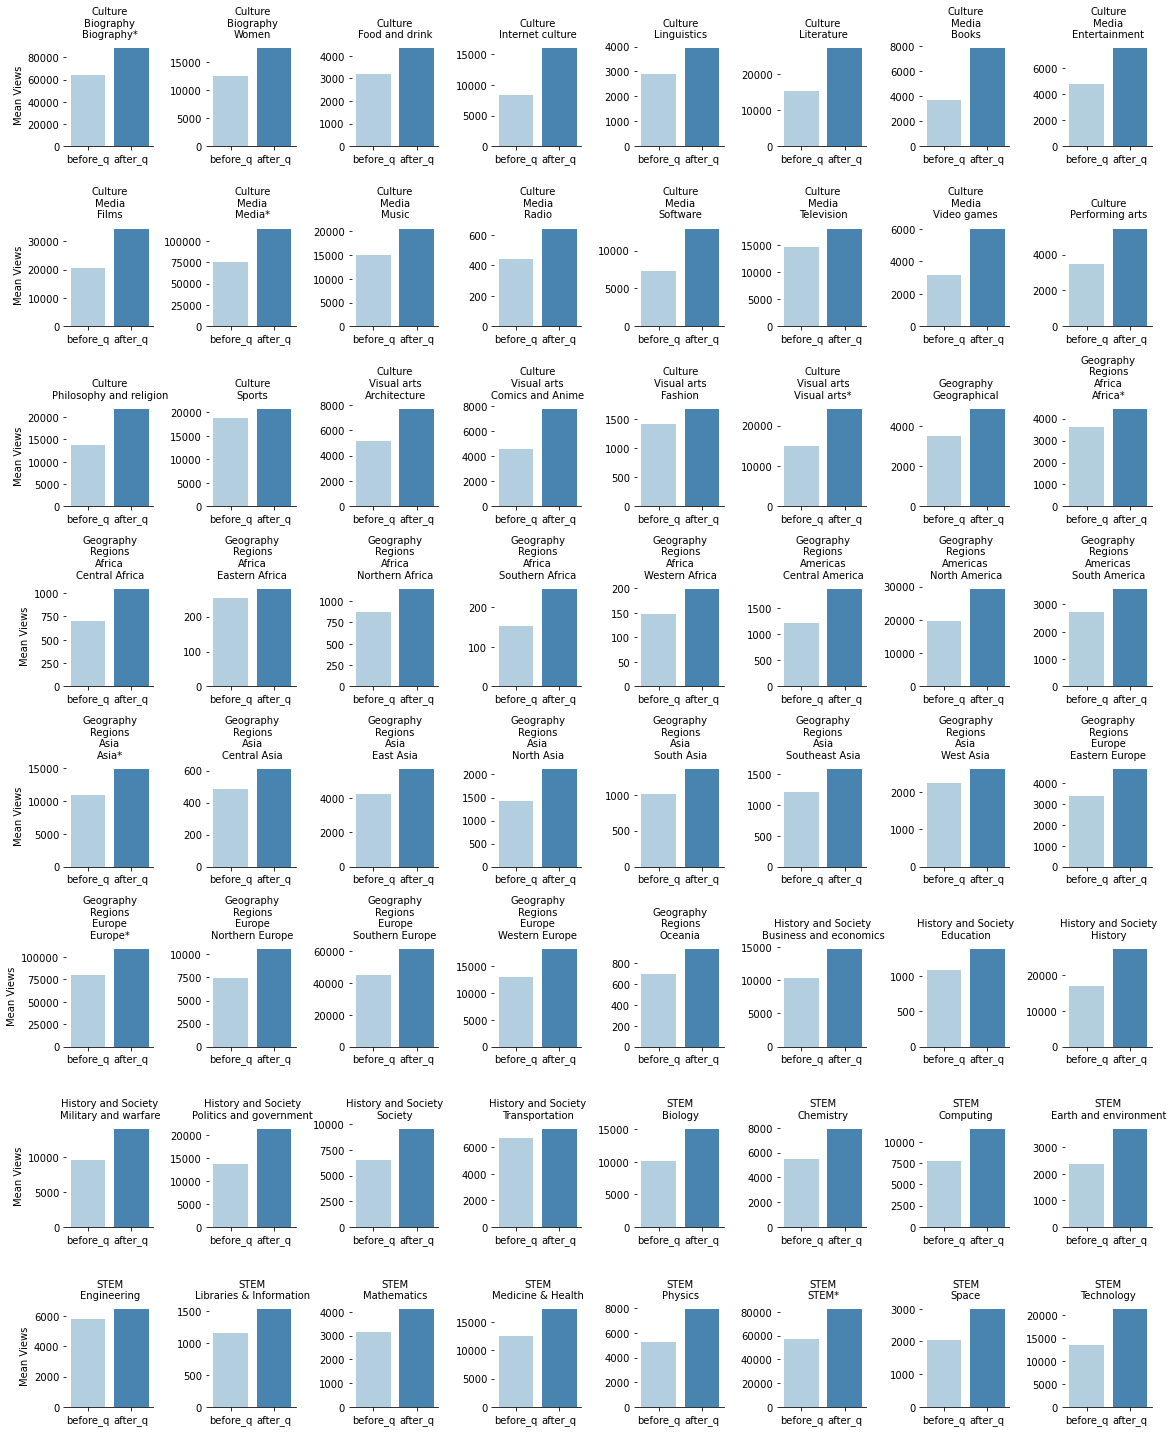

In [30]:
import seaborn as sns

fig = plt.figure(figsize=(12,9))

#we will formate the topic df so that we can print the topic names in a clear way
topic_meanviews_formatted = topic_meanviews.copy()
topic_meanviews_formatted['topic'] = topic_meanviews['topic'].map(lambda x: x.replace('.','\n'))

g = sns.catplot(x="period", y="mean_views", col="topic", order=["views_bq","views_aq"], data=topic_meanviews_formatted, kind="bar",
            col_wrap=8, height=2.5, aspect=.8, sharex=False, sharey=False, palette="Blues")
g = g.despine(left=True)
g = g.set_axis_labels("", "Mean Views")
g = g.set_xticklabels(["before_q", "after_q"])
g = g.set_titles(col_template = "{col_name}")

### **Task 5.3**

Notice that the previous analysis fails to isolate the increases or decreases in each individual topic from the overall increases or decreases in pageviews across Wikipedia in general. That is, it could be that all topics gained/lost pageviews, but some did so more than articles in general, while others did so less than articles in general. To address this issue, you should:


1. Normalize the pageviews counts in the dataframe created in Task 5.1. Instead of using the raw number of pageviews, you should compute, for each day, what fraction of all pageviews a topic received.

2. Create a second visualization that shows not the **raw** value of pageviews before and after, but the **relative** value that you just calculated.

3. **Discuss:** According to Task 5.2, what topics have increased in terms of the raw, absolute number of pageviews after the quarantine started? In relative, rather than absolute, terms, do these findings still hold? If not, what has changed?

---

### ~ 5.3.1

In [31]:
# normalize with the daily count for articles as an article can have many topics
articles_tr = articles.set_index('index').transpose()
articles_tr.index = pd.to_datetime(articles_tr.index)
articles_tr = articles_tr.reset_index().rename(columns={'index': 'date'})
articles_tr_ts = pd.DataFrame(articles_tr.set_index('date').sum(axis=1))
overall_pageviews_articles = articles_tr_ts[0]

In [32]:
# normalize with the daily count for topics
overall_pageviews_topics = topic_views.groupby(level='date').sum()['views']

In [33]:
normalized_pageviews = pd.DataFrame()
normalized_pageviews['views'] = topic_views['views'] / overall_pageviews_articles
normalized_pageviews

views
topic                        date                
Culture.Biography.Biography* 2018-01-01  0.263342
                             2018-01-02  0.239992
                             2018-01-03  0.240286
                             2018-01-04  0.249962
                             2018-01-05  0.250076
...                                           ...
STEM.Technology              2020-07-27  0.037601
                             2020-07-28  0.046091
                             2020-07-29  0.048508
                             2020-07-30  0.051129
                             2020-07-31  0.043948

[60352 rows x 1 columns]

### ~ 5.3.2

In [34]:
before_norm = normalized_pageviews.loc[idx[:,before_quar],:] 
after_norm  = normalized_pageviews.loc[idx[:,after_quar],:] 

# Group by the topics to calculate the mean page views on each period
top_meanviews_bq_norm = before_norm.groupby('topic').mean()
top_meanviews_aq_norm = after_norm.groupby('topic').mean()

# top_meanviews will have the mean page views before and after quarantine for each topics
top_meanviews_norm = top_meanviews_bq_norm.join(top_meanviews_aq_norm, lsuffix='_bq', rsuffix='_aq')

# Rearranging data so we can plot it using seaborn
topic_meanviews_norm = pd.melt(top_meanviews_norm.reset_index(), id_vars='topic', var_name="period", value_name="mean_views")
topic_meanviews_norm = topic_meanviews_norm.sort_values('topic').reset_index(drop=True)
topic_meanviews_norm.head(6)

,topic,period,mean_views
0,Culture.Biography.Biography*,views_bq,0.219956
1,Culture.Biography.Biography*,views_aq,0.215011
2,Culture.Biography.Women,views_aq,0.042592
3,Culture.Biography.Women,views_bq,0.042952
4,Culture.Food and drink,views_bq,0.010910
5,Culture.Food and drink,views_aq,0.010518


<Figure size 864x648 with 0 Axes>

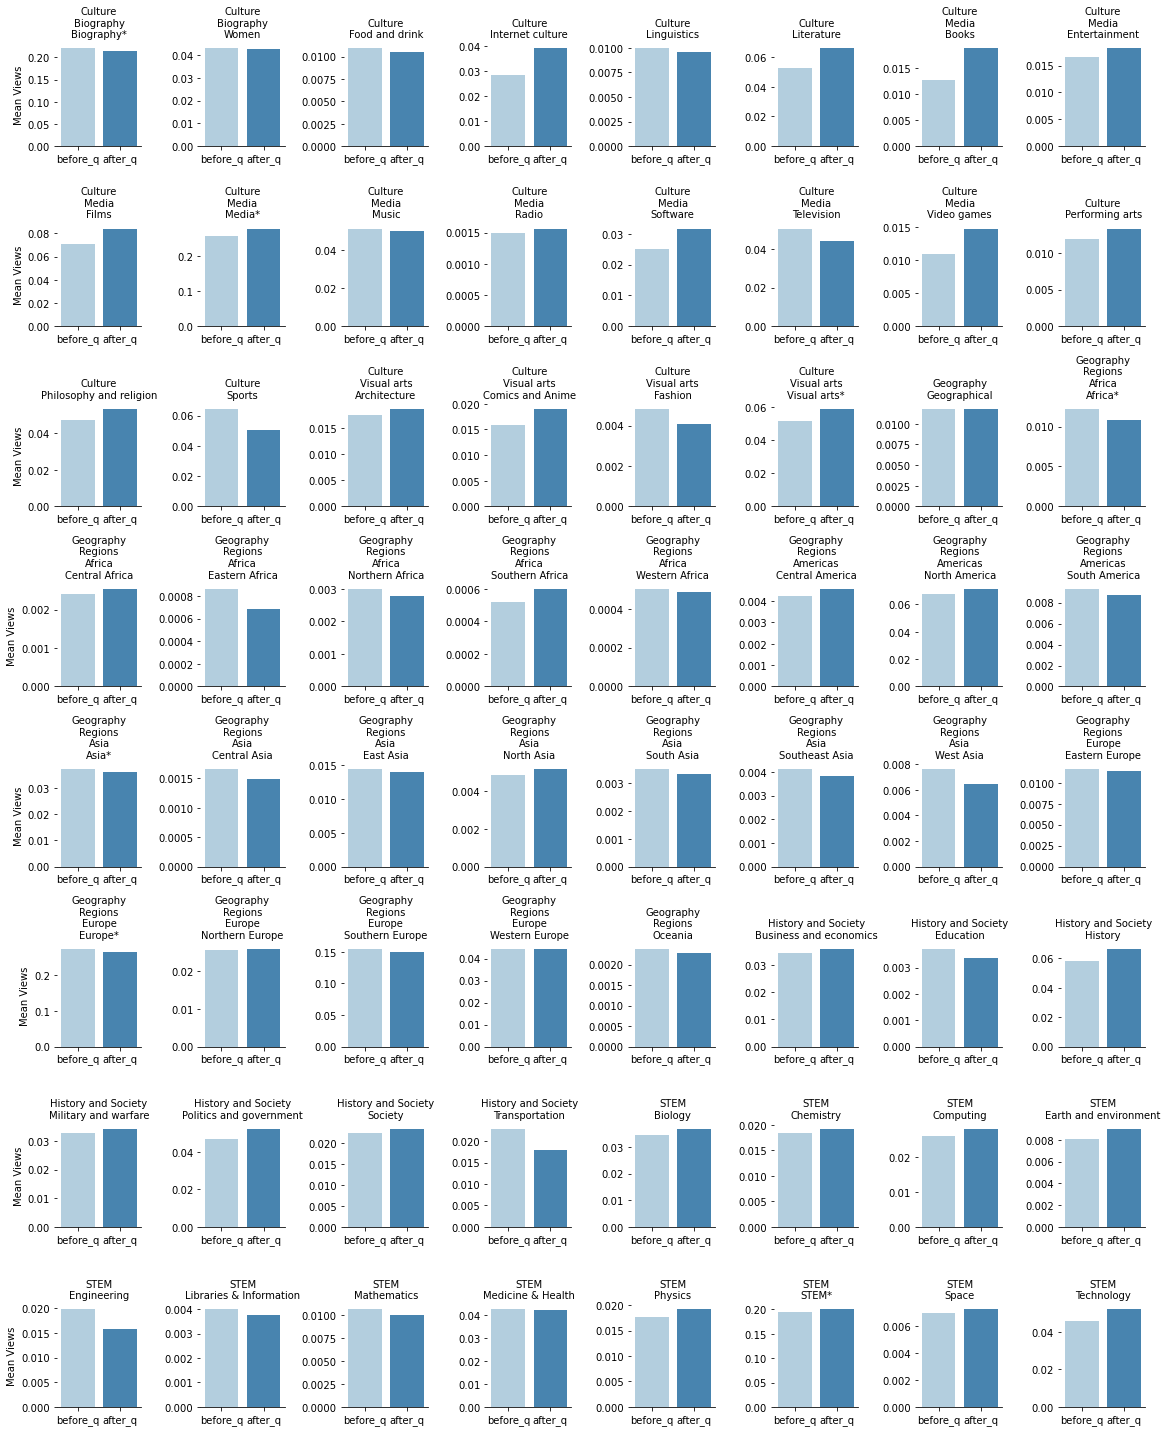

In [35]:
plt.figure(figsize=(12,9))
#we will formate the topic df so that we can print the topic names in a clear way
topic_meanviews_formatted_norm = topic_meanviews_norm.copy()
topic_meanviews_formatted_norm['topic'] = topic_meanviews_norm['topic'].map(lambda x: x.replace('.','\n'))

g = sns.catplot(x="period", y="mean_views", col="topic", order=["views_bq","views_aq"], data=topic_meanviews_formatted_norm, kind="bar",
            col_wrap=8, height=2.5, aspect=.8, sharex=False, sharey=False, palette="Blues")
g = g.despine(left=True)
g = g.set_axis_labels("", "Mean Views")
g = g.set_xticklabels(["before_q", "after_q"])
g = g.set_titles(col_template = "{col_name}")

### ~ 5.3.3

In [36]:
top_meanviews_norm['views_diff'] = top_meanviews_norm['views_aq'] - top_meanviews_norm['views_bq']
top_meanviews_norm = top_meanviews_norm[top_meanviews_norm['views_diff']>0]
print("Topics which really had an increase in interest after the quarantine:")
top_meanviews_norm

Topics which really had an increase in interest after the quarantine:


,views_bq,views_aq,views_diff
topic,,,
Culture.Internet culture,0.028482,0.039087,0.010605
Culture.Literature,0.052418,0.065810,0.013393
Culture.Media.Books,0.012731,0.018832,0.006101
Culture.Media.Entertainment,0.016562,0.018193,0.001630
Culture.Media.Films,0.070900,0.084189,0.013289
Culture.Media.Media*,0.258839,0.279249,0.020410
Culture.Media.Radio,0.001499,0.001564,0.000065
Culture.Media.Software,0.025096,0.031694,0.006598
Culture.Media.Video games,0.010906,0.014728,0.003821


In absolute, almost all topics had an increase in pageviews after the quarantine as people probably spent more time on the internet.


If we consider the relative pageviews, we can remove the effect of this global trend and better consider the variation in interest among the different topics.

We can see that some topics such as geography, transportation, fashion and sport had less attention after the quarantine. We can guess that this due to the fact that people travel less and don't go out (so they don't need to be attractive to other people).

In the meantime, other topics received more attention after the quarantine. The increase is the most significant for articles about litterature/books, video games, films, internet and software. We can explain that by the fact that people had plenty of time for indoor leisur during the quarantine

---